# ---------------Importing the necessary Python packages---------------

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn import preprocessing
from sklearn import metrics
from scipy.stats import norm, skew, uniform, randint
from scipy import stats
import random
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# ---------------Data Exploration---------------

In [2]:
train = pd.read_csv('usjobs_train.csv')
test = pd.read_csv('usjobs_test.csv')

In [3]:
train = train[['ID', 'Jobs_Group', 'Profile', 'Remote', 'Frecuency_Salary', 'Mean_Salary', 'Skills', 'Revenue', 'Employee', 'Company_Score', 'Reviews', 'Director_Score']]
test = test[['ID', 'Jobs_Group', 'Profile', 'Remote', 'Frecuency_Salary', 'Skills', 'Revenue', 'Employee', 'Company_Score', 'Reviews', 'Director_Score']]

In [4]:
train.head()

,ID,Jobs_Group,Profile,Remote,Frecuency_Salary,Mean_Salary,Skills,Revenue,Employee,Company_Score,Reviews,Director_Score
0,job_f2c807527f687b96,Financial Analyst,NaN,Remote,hour,115000.0,"['Salesforce', 'Bachelor']",NaN,XS,4.2,20.0,NaN
1,job_2660d4c53505af10,Controller,NaN,NaN,year,185000.0,"['SQL', 'Master', 'Dynamics 365', 'Snowflake',...",NaN,M,3.5,58.0,0.70
2,sj_50358c44328ae06a,Financial Analyst,Senior,NaN,year,84500.0,"['Word', 'Bachelor', 'Excel']",XXXS,XXXS,3.4,88.0,NaN
3,job_a087fd700e3e85f0,Business Intelligence,Senior,Hybrid,year,111625.0,"['PowerPoint', 'Power BI', 'Tableau', 'Word', ...",XXL,XL,3.8,30.0,0.70
4,job_d2a2538a2c4d2033,Operations Analyst,NaN,Remote,hour,102690.4,['Office'],NaN,XL,4.2,186.0,0.85


In [5]:
test.head()

,ID,Jobs_Group,Profile,Remote,Frecuency_Salary,Skills,Revenue,Employee,Company_Score,Reviews,Director_Score
0,sj_99ad4f80ae7f4835,Business Analyst,Lead,Remote,year,"['PowerPoint', 'Office', 'Excel', 'Agile']",NaN,NaN,5.0,2.0,NaN
1,job_6ff7f1a7c400916a,Financial Analyst,Senior,NaN,year,"['PowerPoint', 'Master', 'Word', 'Bachelor', '...",NaN,XS,NaN,NaN,NaN
2,job_e059d20eba88b17a,ML/AI Engineer,Senior,Hybrid,year,"['Tensor Flow', 'Python', 'Master', 'PhD', 'C+...",NaN,NaN,NaN,NaN,NaN
3,job_79f7953813b13358,Data Scientist,NaN,Remote,year,"['Google Cloud', 'Python', 'SQL', 'PhD']",XL,XL,4.0,275.0,0.78
4,job_892dfe86b96f322b,Financial Analyst,NaN,NaN,year,"['PowerPoint', 'Master', 'Word', 'Excel', 'Bac...",NaN,NaN,NaN,NaN,NaN


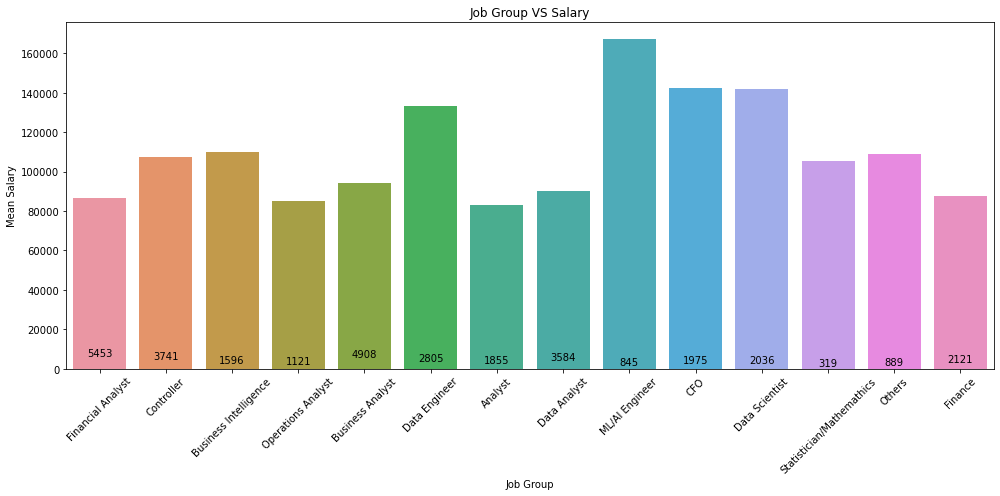

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

plt.figure(figsize=(14, 7))
sns.barplot(x='Jobs_Group', y='Mean_Salary', data=train, ci=None)
plt.xlabel('Job Group')
plt.ylabel('Mean Salary')
plt.title('Job Group VS Salary')
plt.xticks(rotation=45)

# Get counts for each category in Jobs_Group
job_counts = Counter(train['Jobs_Group'])

# Annotate the count above each bar
for i, bar in enumerate(job_counts):
    plt.text(i, job_counts[bar] + 1, str(job_counts[bar]), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

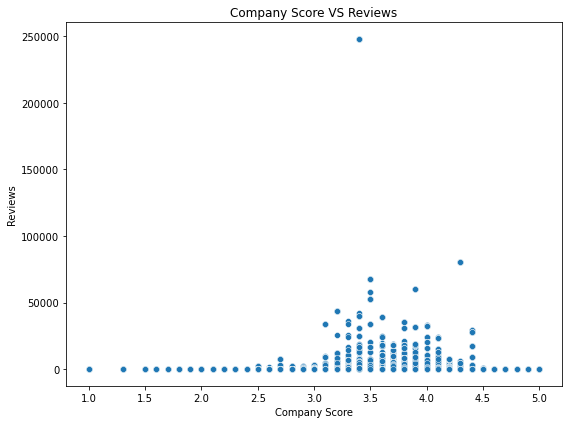

In [7]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Company_Score', y='Reviews', data=train)
plt.xlabel('Company Score')
plt.ylabel('Reviews')
plt.title('Company Score VS Reviews')
plt.tight_layout()

# Show the plot
plt.show()

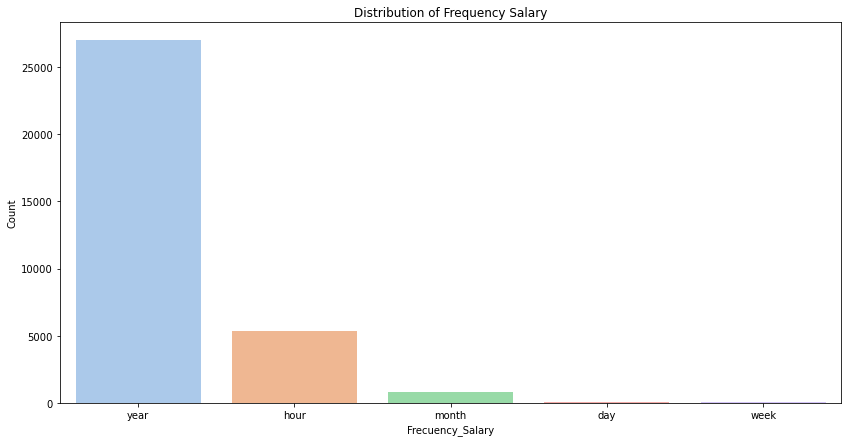

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = train['Frecuency_Salary'].value_counts()

# Create a bar chart using Seaborn
plt.figure(figsize=(14, 7))
sns.set_palette("pastel")  # Setting color palette
sns.barplot(x=category_counts.index, y=category_counts)
plt.title('Distribution of Frequency Salary')
plt.xlabel('Frecuency_Salary')
plt.ylabel('Count')

plt.show()

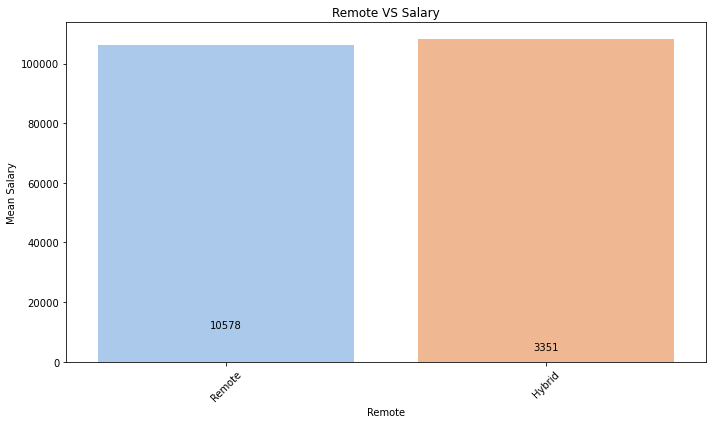

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

plt.figure(figsize=(10, 6))
sns.barplot(x='Remote', y='Mean_Salary', data=train, ci=None)
plt.xlabel('Remote')
plt.ylabel('Mean Salary')
plt.title('Remote VS Salary')
plt.xticks(rotation=45)
remote_data = train['Remote'].dropna()

# Get counts for each category in Remote column excluding NaN
remote_counts = Counter(remote_data)

# Annotate the count above each bar
for i, bar in enumerate(remote_counts):
    plt.text(i, remote_counts[bar] + 1, str(remote_counts[bar]), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()


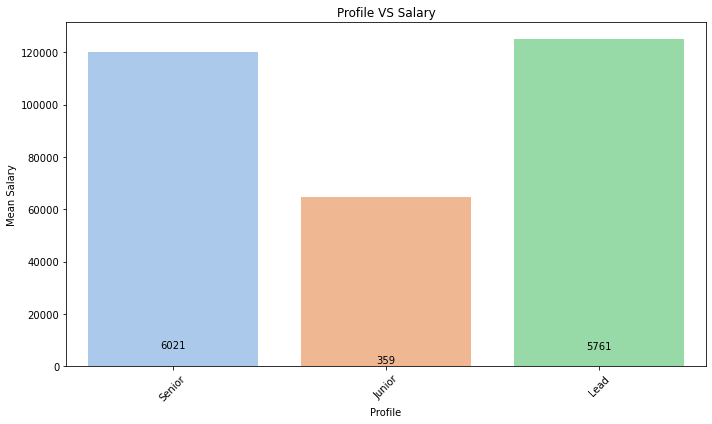

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

plt.figure(figsize=(10, 6))
sns.barplot(x='Profile', y='Mean_Salary', data=train, ci=None)
plt.xlabel('Profile')
plt.ylabel('Mean Salary')
plt.title('Profile VS Salary')
plt.xticks(rotation=45)

# Exclude NaN values from Profile column
profile_data = train['Profile'].dropna()

# Get counts for each category in Profile column excluding NaN
profile_counts = Counter(profile_data)

# Annotate the count above each bar
for i, bar in enumerate(profile_counts):
    plt.text(i, profile_counts[bar] + 1, str(profile_counts[bar]), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

# ---------------Data Cleaning---------------

In [11]:
# Separated the ID column from the Dataframes for reducing errors and to train our model better
train_ID = train['ID']
train.drop('ID', axis=1, inplace=True)

test_ID = test['ID']
test.drop('ID', axis=1, inplace=True)

In [12]:
# Separating our target column
y_train = train['Mean_Salary'].values
train.drop(columns=['Mean_Salary'], axis=1, inplace=True)

In [13]:
# Handling Null Values in the train dataframe
train['Director_Score'].fillna(np.mean(train['Director_Score']), inplace= True)
train['Company_Score'].fillna(np.mean(train['Company_Score']), inplace= True)
train['Reviews'].fillna(np.mean(train['Reviews']), inplace= True)
train['Profile'].fillna(train["Profile"].mode()[0], inplace=True)
train['Remote'].fillna(train["Remote"].mode()[0], inplace=True)
train['Revenue'].fillna(train["Revenue"].mode()[0], inplace=True)
train['Employee'].fillna(train["Employee"].mode()[0], inplace=True)

train['Reviews'] = train['Reviews'].astype('int64')
train.isnull().sum()

Jobs_Group          0
Profile             0
Remote              0
Frecuency_Salary    0
Skills              0
Revenue             0
Employee            0
Company_Score       0
Reviews             0
Director_Score      0
dtype: int64

In [14]:
# Handling Null Values in the test dataframe
test['Director_Score'].fillna(np.mean(test['Director_Score']), inplace=True)
test['Company_Score'].fillna(np.mean(test['Company_Score']), inplace=True)
test['Reviews'].fillna(np.mean(test['Reviews']), inplace=True)
test['Profile'].fillna(test["Profile"].mode()[0], inplace=True)
test['Remote'].fillna(test["Remote"].mode()[0], inplace=True)
test['Revenue'].fillna(test["Revenue"].mode()[0], inplace=True)
test['Employee'].fillna(test["Employee"].mode()[0], inplace=True)

test['Reviews'] = test['Reviews'].astype('int64')
test.isnull().sum()

Jobs_Group          0
Profile             0
Remote              0
Frecuency_Salary    0
Skills              0
Revenue             0
Employee            0
Company_Score       0
Reviews             0
Director_Score      0
dtype: int64

# ---------------Handling Skewness---------------

### Train Dataset

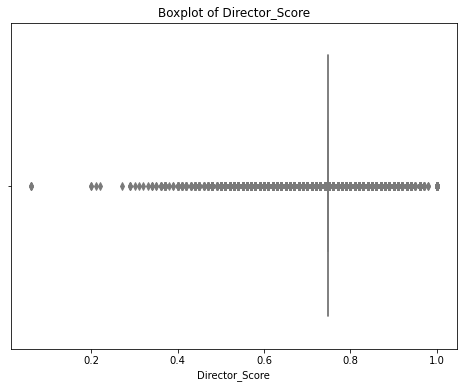

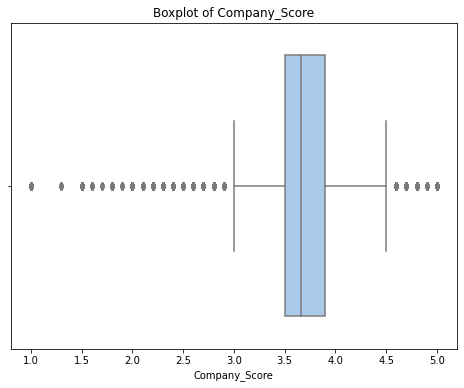

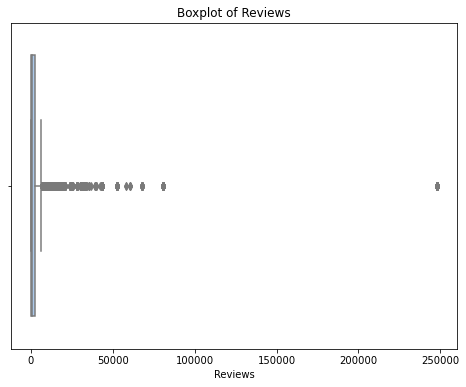

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['Director_Score', 'Company_Score', 'Reviews']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=train, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

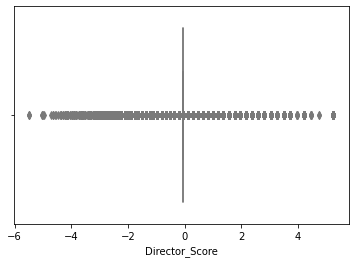

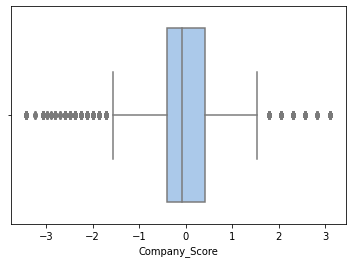

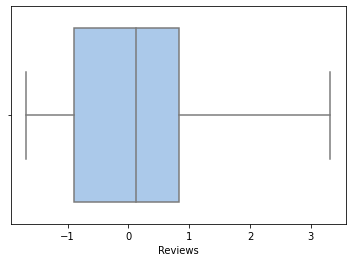

In [16]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

transformed_feature = pt.fit_transform(train[['Director_Score']])
train['Director_Score'] = transformed_feature
sns.boxplot(x='Director_Score', data=train)
plt.show()

transformed_feature = pt.fit_transform(train[['Company_Score']])
train['Company_Score'] = transformed_feature
sns.boxplot(x='Company_Score', data=train)
plt.show()

transformed_feature = pt.fit_transform(train[['Reviews']])
train['Reviews'] = transformed_feature
sns.boxplot(x='Reviews', data=train)
plt.show()

### Test Dataset

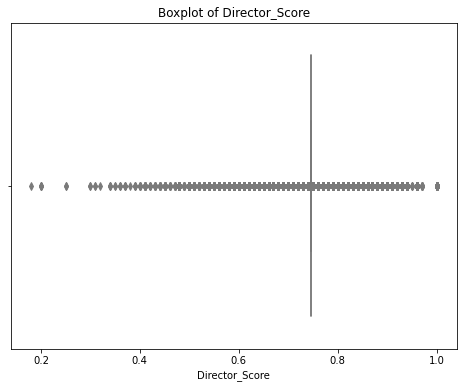

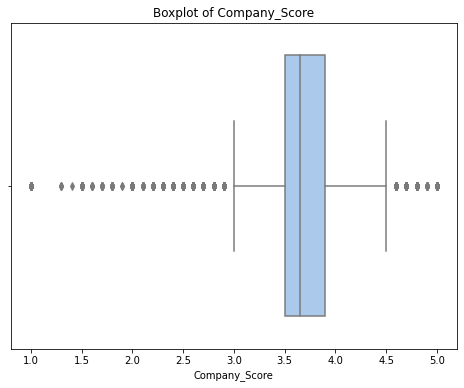

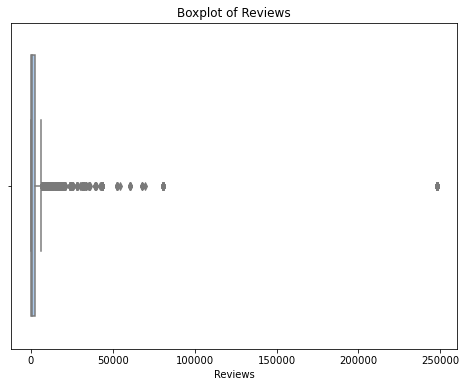

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['Director_Score', 'Company_Score', 'Reviews']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=test, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

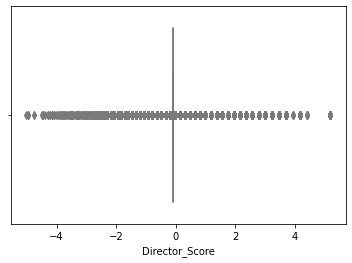

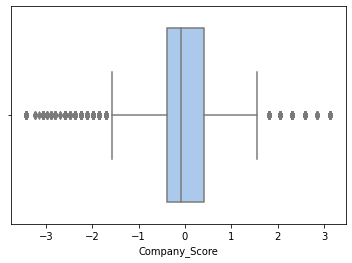

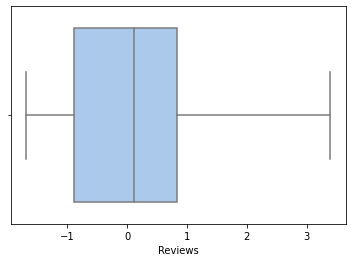

In [18]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

transformed_feature = pt.fit_transform(test[['Director_Score']])
test['Director_Score'] = transformed_feature
sns.boxplot(x='Director_Score', data=test)
plt.show()

transformed_feature = pt.fit_transform(test[['Company_Score']])
test['Company_Score'] = transformed_feature
sns.boxplot(x='Company_Score', data=test)
plt.show()

transformed_feature = pt.fit_transform(test[['Reviews']])
test['Reviews'] = transformed_feature
sns.boxplot(x='Reviews', data=test)
plt.show()

# ---------------Data Encoding---------------

In [19]:
# One-hot Encoding the required columns in the Dataframe
train = pd.get_dummies(train, columns=['Jobs_Group', 'Frecuency_Salary', 'Remote', 'Profile', 'Revenue', 'Employee'])

test = pd.get_dummies(test, columns=['Jobs_Group', 'Frecuency_Salary', 'Remote', 'Profile', 'Revenue', 'Employee'])

In [20]:
# Label Encoding the required columns in the Dataframe
label_encoder = LabelEncoder()
train['Skills'] = train['Skills'].str.strip('[]').str.replace("'", '')
train['Skills'] = train['Skills'].fillna(0)
train['Skills'] = label_encoder.fit_transform(train['Skills'])

test['Skills'] = test['Skills'].str.strip('[]').str.replace("'", '')
test['Skills'] = test['Skills'].fillna(0)
test['Skills'] = label_encoder.fit_transform(test['Skills'])

In [21]:
columns_to_convert = ['Jobs_Group_Analyst', 'Jobs_Group_Business Analyst',
       'Jobs_Group_Business Intelligence', 'Jobs_Group_CFO',
       'Jobs_Group_Controller', 'Jobs_Group_Data Analyst',
       'Jobs_Group_Data Engineer', 'Jobs_Group_Data Scientist',
       'Jobs_Group_Finance', 'Jobs_Group_Financial Analyst',
       'Jobs_Group_ML/AI Engineer', 'Jobs_Group_Operations Analyst',
       'Jobs_Group_Others', 'Jobs_Group_Statistician/Mathemathics',
       'Frecuency_Salary_day', 'Frecuency_Salary_hour',
       'Frecuency_Salary_month', 'Frecuency_Salary_week',
       'Frecuency_Salary_year', 'Remote_Hybrid', 'Remote_Remote',
       'Profile_Junior', 'Profile_Lead', 'Profile_Senior', 'Revenue_L',
       'Revenue_M', 'Revenue_S', 'Revenue_XL', 'Revenue_XS', 'Revenue_XXL',
       'Revenue_XXS', 'Revenue_XXXL', 'Revenue_XXXS', 'Employee_L',
       'Employee_M', 'Employee_S', 'Employee_XL', 'Employee_XS',
       'Employee_XXL', 'Employee_XXS', 'Employee_XXXL', 'Employee_XXXS']

# Converting True to 1 and False to 0 in specified columns
train[columns_to_convert] = train[columns_to_convert].astype(int)
test[columns_to_convert] = test[columns_to_convert].astype(int)

In [22]:
from sklearn.preprocessing import RobustScaler

# Scaling the data for further reducing error and increasing the data understanding for the ML Algorithm
scaler = RobustScaler()
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [23]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [24]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,1.148491,1.444106,-0.656653,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0
1,1.037347,-0.384136,-0.462183,-0.748426,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2,1.316659,-0.615904,-0.380281,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
3,0.331555,0.354804,-0.585186,-0.748426,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
4,-0.003585,1.444106,-0.225472,1.826572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0


In [25]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.274298,4.006712,-0.987182,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.267158,0.000000,0.412090,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0
2,1.242976,0.000000,0.412090,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.129203,0.896037,-0.138820,0.548209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
4,0.269231,0.000000,0.412090,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ----Defining our Evaluation Metrics as per the Kaggle Competition----

In [26]:
def MAPE(y_train, y_pred): 
    y_train, y_pred = np.array(y_train), np.array(y_pred)
    
    # masking is done here to handle/avoid zero division error
    y_train, y_pred = y_train[y_train != 0], y_pred[y_train != 0]
    percentage_error = np.abs((y_train - y_pred) / y_train)
    mape = np.mean(percentage_error) * 100
    
    return mape

# ---------------Model Building---------------

### Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# DecisionTreeRegressor
dt = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2'],
}

# GridSearchCV with n_jobs and verbose
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search_dt.fit(train, y_train)
print("Best hyperparameters:", grid_search_dt.best_params_)
best_model_dt = grid_search_dt.best_estimator_

y_pred_dt = best_model_dt.predict(train)
y_pred_test_dt = best_model_dt.predict(test)

mape_dt = MAPE(y_train, y_pred_dt)
print('MAPE Decision Tree Regressor:', mape_dt)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
MAPE Decision Tree Regressor: 23.623361415484


### Randoim Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Random Forest Regressor
rfr = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2'],
}


# GridSearchCV with n_jobs and verbose
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(train)
y_pred_test = best_model.predict(test)
mape = MAPE(y_train, y_pred)
print('MAPE Random Forest Regressor:', mape)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
MAPE Random Forest Regressor: 12.867165421269025


### Extra Trees Regressor

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# ExtraTreesRegressor
et = ExtraTreesRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2'],
}

# GridSearchCV with n_jobs and verbose
grid_search_et = GridSearchCV(estimator=et, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search_et.fit(train, y_train)
print("Best hyperparameters:", grid_search_et.best_params_)
best_model_et = grid_search_et.best_estimator_

y_pred_et = best_model_et.predict(train)
y_pred_test_et = best_model_et.predict(test)

mape_et = MAPE(y_train, y_pred_et)
print('MAPE Extra Trees Regressor:', mape_et)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
MAPE Extra Trees Regressor: 16.69213307540963


### LightGBM Regressor

In [30]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# LightGBM Regressor
lgbm = LGBMRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_child_samples': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# GridSearchCV with n_jobs and verbose
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search_lgbm.fit(train, y_train)
print("Best hyperparameters:", grid_search_lgbm.best_params_)
best_model_lgbm = grid_search_lgbm.best_estimator_

y_pred_lgbm = best_model_lgbm.predict(train)
y_pred_test_lgbm = best_model_lgbm.predict(test)

mape_lgbm = MAPE(y_train, y_pred_lgbm)
print('MAPE LightGBM Regressor:', mape_lgbm)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 33248, number of used features: 45
[LightGBM] [Info] Start training from score 104938.651998
Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_samples': 10, 'n_estimators': 300, 'subsample': 0.8}
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (

### XGBRegressor

In [31]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# XGBRegressor
xgb = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# GridSearchCV with n_jobs and verbose
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search_xgb.fit(train, y_train)
print("Best hyperparameters:", grid_search_xgb.best_params_)
best_model_xgb = grid_search_xgb.best_estimator_

y_pred_xgb = best_model_xgb.predict(train)
y_pred_test_xgb = best_model_xgb.predict(test)

mape_xgb = MAPE(y_train, y_pred_xgb)
print('MAPE XGBoost Regressor:', mape_xgb)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.9}
MAPE XGBoost Regressor: 17.186337583289138


# ---------------Ensemble Learning Techniques---------------

### Combining the Predictions of all the trained Models above

In [32]:
ensemble_predictions = np.mean([y_pred_dt, y_pred, y_pred_et, y_pred_lgbm, y_pred_xgb], axis=0)
mape_final = MAPE(y_train, ensemble_predictions)
print("Ensemble MAPE:", mape_final)

Ensemble MAPE: 17.493983719722998


In [33]:
y_pred_test_ensemble = (
    y_pred_test +
    y_pred_test_et +
    y_pred_test_lgbm +
    y_pred_test_dt +
    y_pred_test_xgb
) / 6

In [34]:
final_pred = y_pred_test_ensemble
submission = pd.DataFrame()
submission['ID'] = test_ID
submission['Mean_Salary'] = final_pred
submission.to_csv('submission.csv', index=False)